## Домашнее задание №3

### Задание 1:  Визуализация решающих поверхностей в kNN.

Прочтите [статью](https://proglib.io/p/metod-k-blizhayshih-sosedey-k-nearest-neighbour-2021-07-19) про метод ближайших соседей. 

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [25]:
# pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows', None) # вывод результатов без сокращения строк
pd.set_option('display.max_columns', None) # отображение всех столбцов

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h4>Комментарий студента: <a class="tocSkip"> </h4>

Пропусков нет. Все переменные численные.

**Задача 1.2** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 1.3** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
# Для обучения оставим два признака - alcohol, magnesium
train_df = X_train[['alcohol', 'magnesium']]
test_df = X_test[['alcohol', 'magnesium']]

In [7]:
# Масштабируем признаки
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.fit_transform(test_df)

In [8]:
# Приводим масштабированные признаки к pandas DataFrame
train_scaled_df = pd.DataFrame(train_scaled, columns=train_df.columns, index=train_df.index)

test_scaled_df = pd.DataFrame(test_scaled, columns=test_df.columns, index=test_df.index)

In [9]:
# Зададим параметр k ближайших соседей
k_range = (1, 3, 5, 10, 15, 25)

In [10]:
# Словари для записи accuracy_score модели для разных k
scores_test = {}
scores_train = {}

# Список для хранения обученных моделей
knn_list = []

# Цикл обучения модели для каждого из k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(train_scaled, y_train)
    y_test_pred = knn.predict(test_scaled_df)
    y_train_pred = knn.predict(train_scaled_df)
    
    scores_test[k] = metrics.accuracy_score(y_test, y_test_pred)
    scores_train[k] = metrics.accuracy_score(y_train, y_train_pred)

    knn_list.append(knn)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fi

In [11]:
# Вывод результатов
print("NN\tTrain\tTest")
for k in k_range:
    print(f'{k}\t{scores_train[k]:.2f}\t{scores_test[k]:.2f}')
   

NN	Train	Test
1	0.99	0.70
3	0.84	0.74
5	0.81	0.74
10	0.81	0.78
15	0.78	0.78
25	0.73	0.72


In [12]:
knn_list

[KNeighborsClassifier(metric='euclidean', n_neighbors=1),
 KNeighborsClassifier(metric='euclidean', n_neighbors=3),
 KNeighborsClassifier(metric='euclidean'),
 KNeighborsClassifier(metric='euclidean', n_neighbors=10),
 KNeighborsClassifier(metric='euclidean', n_neighbors=15),
 KNeighborsClassifier(metric='euclidean', n_neighbors=25)]

Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [13]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 43.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [14]:
import mlxtend

**Задача 1.4** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

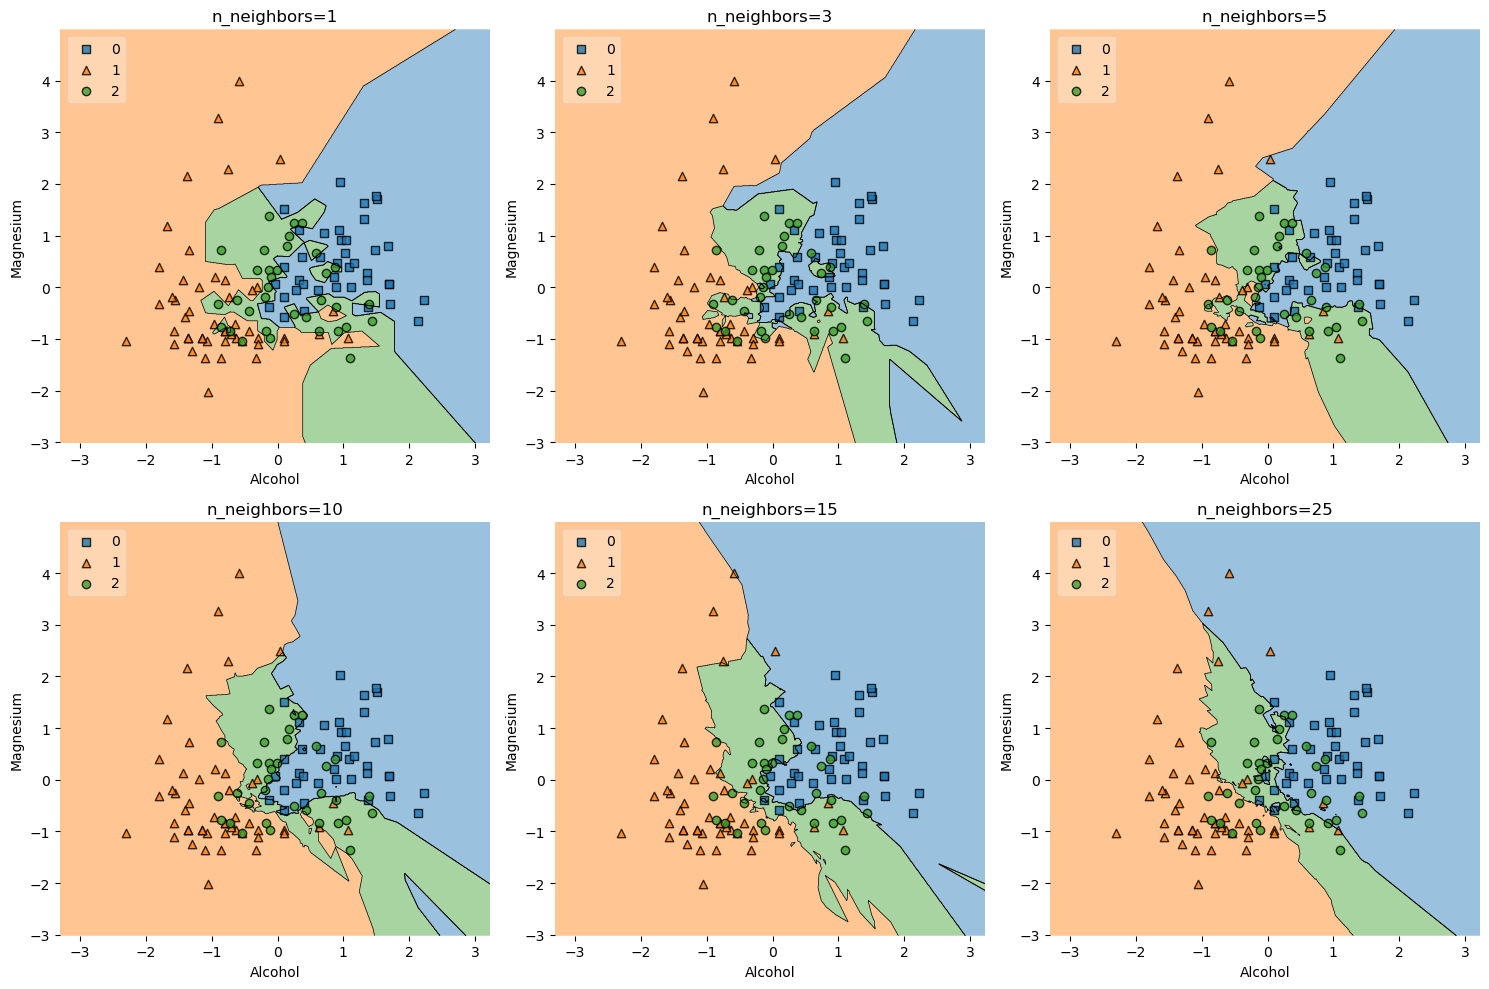

In [15]:
# Построение графиков решающих поверхностей для каждого классификатора
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15, 10))


for i, k in enumerate(knn_list):
    ax = plt.subplot(gs[i])
    plot_decision_regions(X=train_scaled, 
                          y=y_train, 
                          clf=k, 
                          legend=2, 
                          ax=ax
                          )

    ax.set_title(f"n_neighbors={k.n_neighbors}")
    ax.set_xlabel("Alcohol")
    ax.set_ylabel("Magnesium")

plt.tight_layout()
plt.show()

**Задача 1.5** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

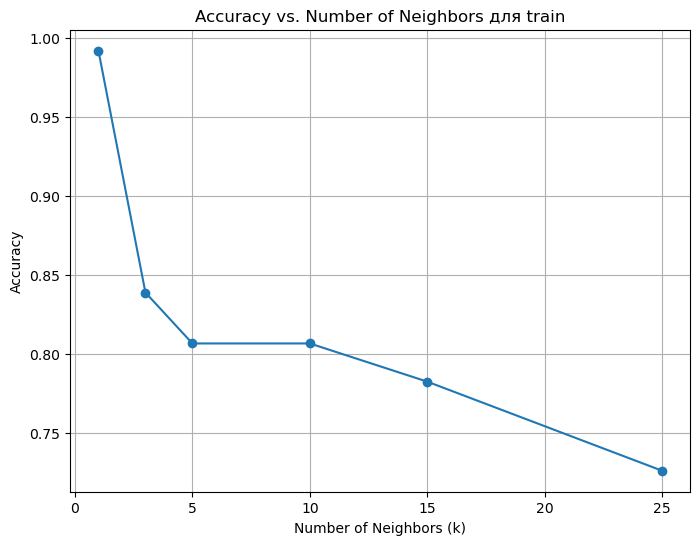

In [16]:
# Построение графика из словаря scores_train
plt.figure(figsize=(8, 6))
plt.plot(list(scores_train.keys()), list(scores_train.values()), marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors для train')
plt.grid(True)
plt.show()

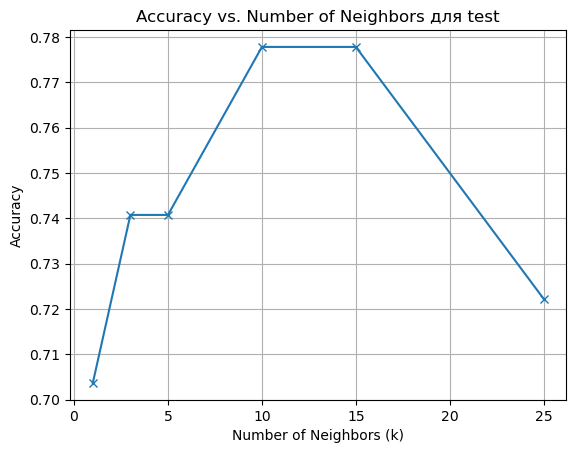

In [17]:
# Построение графика из словаря scores_test
plt.plot(list(scores_test.keys()), list(scores_test.values()), marker='x')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors для test')
plt.grid(True)
plt.show()

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h4>Комментарий студента: <a class="tocSkip"> </h4>

* Для обучающей выборки наивысший показатель точности у k=1
* Для обучающей выборки c увeличением количества k ближайших соседей - accuracy снижается

* Для тестовой выборки наивысший показатель точности у k=10 и k=15
* Для тестовой выборки c увeличением количества k ближайших соседей - accuracy растет до k=10, сохраняется на том же уровне для k=15 и с k=20 начинает медленно снижаться.

* Если смотреть на геометрию полученных решающих поверхностей, то поверхности для k=10 и k=15 в целом выглядят похоже, у k=15 меньшн "рвыных краев" и сложных границ.

В целом, за базу можно взять модель с k=10.

### Задание 2** (бонус): Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

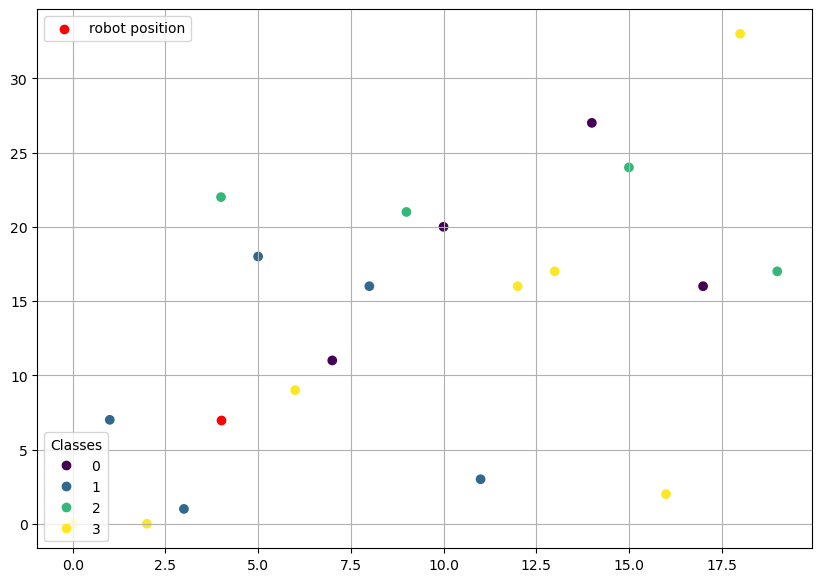

In [18]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = # <ВАШ КОД ЗДЕСЬ>
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = # <ВАШ КОД ЗДЕСЬ>
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        
        # <ВАШ КОД ЗДЕСЬ>

SyntaxError: invalid syntax (189204102.py, line 21)

**Задача 2.2** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [23]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = # <ВАШ КОД ЗДЕСЬ>
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

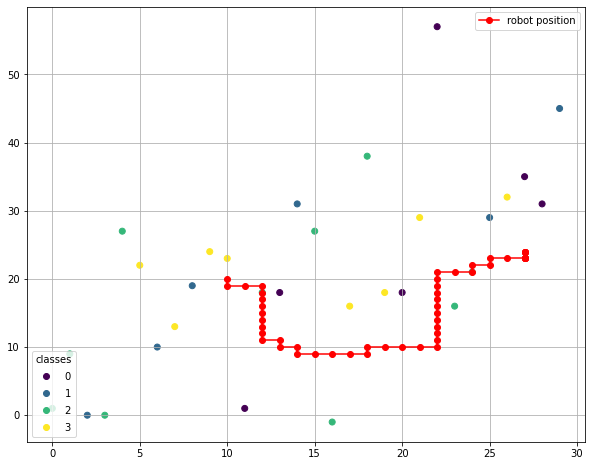

In [24]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных, содержащих информацию об автомобилях и их стоимости.

In [3]:
data = pd.read_csv('Automobile.csv')
data.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Мы будем решать задачу предсказания стоимости автомобиля `price` в зависимости от его характеристик.

**Задача 3.1** Есть ли в наборе данных пропущенные значения? Обработайте их любым способом.

* если пропусков в столбце мало, можете удалить их
* если пропусков много, лучше заполнить их средним значением или медианой (по столбцу).

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
data.isin(['?']).sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h4>Комментарий студента: <a class="tocSkip"> </h4>

* Больше всего пропусков в столбце normalized-losses

In [5]:
# ? заменим на NaN
data[data.columns.tolist()] = data[data.columns.tolist()].replace('?', np.nan)

In [6]:
# Удалим пропуски
data = data.dropna()

**Задача 3.2** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h4>Комментарий студента: <a class="tocSkip"> </h4>

symboling и	normalized-losse - назначение этих признаков не очевидно, описание датасета отстутствует, предлагается удалить эти два столбца

In [7]:
data = data.drop(columns=['symboling', 'normalized-losses'])

**Задача 3.3** Постройте матрицу корреляций.

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [8]:
data['price']=data['price'].astype('float')

In [9]:
# Матрица корреляций
num_data = data.select_dtypes(include=[np.number])
cor_matrix = num_data.corr()

In [10]:
cor_matrix

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
wheel-base,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.291431,-0.580657,-0.611750,0.734419
length,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.184814,-0.724544,-0.724599,0.760952
width,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.258752,-0.666684,-0.693339,0.843371
height,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.233308,-0.199737,-0.226136,0.244836
curb-weight,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.224724,-0.762155,-0.789338,0.893639
engine-size,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.141097,-0.699139,-0.714095,0.841496
compression-ratio,0.291431,0.184814,0.258752,0.233308,0.224724,0.141097,1.000000,0.278332,0.221483,0.209361
city-mpg,-0.580657,-0.724544,-0.666684,-0.199737,-0.762155,-0.699139,0.278332,1.000000,0.971999,-0.692273
highway-mpg,-0.611750,-0.724599,-0.693339,-0.226136,-0.789338,-0.714095,0.221483,0.971999,1.000000,-0.720090
price,0.734419,0.760952,0.843371,0.244836,0.893639,0.841496,0.209361,-0.692273,-0.720090,1.000000


<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h4>Комментарий студента: <a class="tocSkip"> </h4>

С целевой переменной (price) больше всего коррелируют вещественные признаки:
* curb-weight (0.89)
* engine-size (0.84)
* width (0.84)
* length (0.76)
* wheel-base (0.73)
* highway-mpg (-0.72)
* city-mpg (-0.69)

**Задача 3.4** Закодируйте категориальные признаки.

Можете использовать любые кодировки из библиотеки target_encoders или же OneHotEncoder из sklearn.

In [11]:
df_encoded = pd.get_dummies(data, drop_first=True)

In [12]:
df_encoded.head()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,bore_2.91,bore_2.92,bore_2.97,bore_2.99,bore_3.01,bore_3.03,bore_3.05,bore_3.08,bore_3.13,bore_3.15,bore_3.17,bore_3.19,bore_3.24,bore_3.27,bore_3.31,bore_3.33,bore_3.34,bore_3.35,bore_3.39,bore_3.43,bore_3.46,bore_3.50,bore_3.54,bore_3.58,bore_3.60,bore_3.61,bore_3.62,bore_3.63,bore_3.70,bore_3.76,bore_3.78,bore_3.94,stroke_2.19,stroke_2.36,stroke_2.64,stroke_2.80,stroke_2.87,stroke_3.03,stroke_3.07,stroke_3.08,stroke_3.10,stroke_3.11,stroke_3.15,stroke_3.16,stroke_3.19,stroke_3.21,stroke_3.23,stroke_3.27,stroke_3.29,stroke_3.35,stroke_3.39,stroke_3.40,stroke_3.41,stroke_3.46,stroke_3.47,stroke_3.50,stroke_3.52,stroke_3.54,stroke_3.58,stroke_3.64,stroke_3.90,stroke_4.17,horsepower_101,horsepower_102,horsepower_106,horsepower_110,horsepower_111,horsepower_112,horsepower_114,horsepower_115,horsepower_116,horsepower_120,horsepower_121,horsepower_123,horsepower_134,horsepower_140,horsepower_142,horsepower_143,horsepower_145,horsepower_152,horsepower_155,horsepower_156,horsepower_160,horsepower_161,horsepower_162,horsepower_176,horsepower_200,horsepower_48,horsepower_52,horsepower_55,horsepower_56,horsepower_58,horsepower_60,horsepower_62,horsepower_68,horsepower_69,horsepower_70,horsepower_73,horsepower_76,horsepower_82,horsepower_84,horsepower_85,horsepower_86,horsepower_88,horsepower_90,horsepower_92,horsepower_94,horsepower_95,horsepower_97,peak-rpm_4200,peak-rpm_4250,peak-rpm_4350,peak-rpm_4400,peak-rpm_4500,peak-rpm_4750,peak-rpm_4800,peak-rpm_4900,peak-rpm_5000,peak-rpm_5100,peak-rpm_5200,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_6000,peak-rpm_6600
3,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,F

**Задача 3.5** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [13]:
y_car = df_encoded['price']
X_car = df_encoded.drop(columns='price')

In [14]:
print(y_car.shape, X_car.shape)

(159,) (159, 176)


In [15]:
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_car, y_car, test_size=0.3, random_state=42)

In [16]:
print(X_car_train.shape, X_car_test.shape, y_car_train.shape, y_car_test.shape)

(111, 176) (48, 176) (111,) (48,)


**Задача 3.6** Масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [17]:
# Масштабируем признаки
scaler = StandardScaler()

scaler.fit(X_car_train)

car_train_scaled = scaler.transform(X_car_train)

car_test_scaled = scaler.transform(X_car_test)

In [18]:
# Приводим масштабированные признаки к pandas DataFrame
car_train_scaled_df = pd.DataFrame(car_train_scaled, columns=X_car_train.columns, index=X_car_train.index)

car_test_scaled_df = pd.DataFrame(car_test_scaled, columns=X_car_test.columns, index=X_car_test.index)

In [19]:
print(car_train_scaled_df.shape, car_test_scaled_df.shape)

(111, 176) (48, 176)


**Задача 3.7** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках, а также r2.

In [23]:
car_price_lr = LinearRegression()
car_price_lr.fit(car_train_scaled_df, y_car_train)

pred_car_price_train = car_price_lr.predict(car_train_scaled_df)
pred_car_price_test = car_price_lr.predict(car_test_scaled_df)

print(f"Train R2: {metrics.r2_score(y_car_train, pred_car_price_train):.3f}, RMSE: {metrics.mean_squared_error(y_car_train, pred_car_price_train)**0.5:.3f}")
print(f"Test R2: {metrics.r2_score(y_car_test, pred_car_price_test):.3f}, RMSE: {metrics.mean_squared_error(y_car_test, pred_car_price_test)**0.5:.3f}")

Train R2: 0.990, RMSE: 616.105
Test R2: 0.707, RMSE: 2819.955


<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h4>Комментарий студента: <a class="tocSkip"> </h4>

Показатели для обучающей выборки значительно лучше чем для тестовой, следовательно наблюдается перееобчение модели.

**Задача 3.8** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [27]:
print(car_price_lr.coef_)

[-1.52676870e+01  4.10612003e+02  4.48871329e+03 -1.24426039e+02
  1.58641585e+03  7.85179802e+02 -8.12880610e+01 -7.49659214e+02
  1.99280392e+02  4.25900644e+02  3.47413345e+02  7.04188195e+01
  6.89842094e+01  1.87503790e+01  3.32137062e+01 -6.90398723e+01
 -2.56155605e+02  3.14876901e+01 -3.76180555e+02  8.03333584e+01
  8.35598257e-12  6.74745600e+01  1.93114428e+01 -5.12203247e+01
 -5.82794678e+01 -2.61078314e+02  1.20349301e+02  8.34647252e+02
 -8.66171484e+01 -9.17870278e+02 -2.89339479e+03 -3.20723768e+03
 -2.28374617e+03  2.75590915e+01  4.17864944e+02 -1.80040119e+02
  1.61303811e+02  1.93114428e+01 -1.49964250e+02 -1.32025492e+02
 -3.90580466e+01  6.00024116e+00  3.94862765e+02  2.83992868e+02
 -1.20349301e+02  2.98427949e-12 -2.54135795e+02  5.98070017e+00
  2.73255896e+02  1.65615260e+02  6.05461856e+01 -4.43378667e-12
  2.28201560e+01  9.85471237e+01  2.01636317e+02  1.23325662e+02
 -2.99168860e+02  1.17689142e+02 -1.11271385e+02  1.81925096e+02
  8.20064844e+01 -1.07188

**Задача 3.9** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [28]:
# Lasso-регрессия
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(car_train_scaled_df, y_car_train)
print(lasso.coef_)

[ 2.86601129e+02  0.00000000e+00  2.62871983e+03 -1.94391987e+02
  1.72691048e+03  0.00000000e+00 -0.00000000e+00 -5.55486751e+02
 -0.00000000e+00  1.14708335e+03  2.11735177e+02 -1.80539118e+01
  0.00000000e+00  4.96824110e+00  0.00000000e+00  1.32566494e+02
 -2.35899183e+02  0.00000000e+00 -6.42727890e+02 -0.00000000e+00
  0.00000000e+00  1.67520828e+02 -1.54294973e+02 -0.00000000e+00
 -2.22321361e+02 -0.00000000e+00  0.00000000e+00  7.69029853e+02
 -0.00000000e+00 -6.08940008e+02 -1.58420191e+03 -1.64543491e+03
 -1.20076480e+03 -0.00000000e+00  8.06427575e+01 -0.00000000e+00
  0.00000000e+00 -2.77580282e+01 -0.00000000e+00  0.00000000e+00
 -4.76650817e+02  0.00000000e+00  1.10596602e+02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.03745585e+01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.01690520e+02  0.00000000e+00  5.27948698e+01
 -1.75656739e+02  0.00000000e+00 -6.25574656e+01  5.60089104e+01
  3.70572585e+01 -2.41549

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h4>Комментарий студента: <a class="tocSkip"> </h4>

Веса уменьшились, многие обнулились

In [29]:
# Ridge-регрессия
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(car_train_scaled_df, y_car_train)
print(ridge.coef_)

[ 5.35074591e+02  3.54749624e+02  7.33662787e+02 -2.16397527e+02
  8.01691132e+02  3.88909671e+02  7.95757070e+01 -4.29887876e+02
 -2.42997044e+02  2.63489862e+02  7.13183626e+01 -1.46560239e+02
 -4.13985558e+01  1.42128808e+02  2.08264102e+01  3.52996781e+02
 -2.00945983e+02 -7.04913796e+01 -1.24845449e+02 -9.93358821e+01
  0.00000000e+00  1.49951278e+02 -1.03793240e+02 -1.15128566e+02
 -2.28846984e+02  8.38079336e+01 -4.63358148e+01  6.26074505e+02
 -3.14835781e+01 -3.15192675e+02 -3.17807967e+02 -2.61211622e+02
 -2.36299336e+02 -1.70577002e+02  1.56907366e+02 -8.61907977e+01
  3.93413145e+01 -1.03793240e+02  1.00864021e+02  1.94432456e+02
 -3.53734547e+02  1.46685725e+02  6.77708081e+01 -1.41326191e+02
  4.63358148e+01  0.00000000e+00  1.77264597e+02 -9.72303270e+01
  3.67221758e+01 -1.54142118e+01 -5.38322682e+01  0.00000000e+00
 -1.48334219e+00 -2.34384966e+02 -3.69125510e+01 -3.12954306e+00
  1.04551574e+02 -5.09372161e+01 -1.24126380e+02  8.14531395e+01
 -2.23383483e+01 -9.64008

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h4>Комментарий студента: <a class="tocSkip"> </h4>

Принципиальной разницы между весами линейной регрессии и ridge-регресии не видно.


**Задача 3.10** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.237e+06, tolerance: 4.154e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+06, tolerance: 4.154e+05
  model = cd_fast.enet_coordinate_descent(


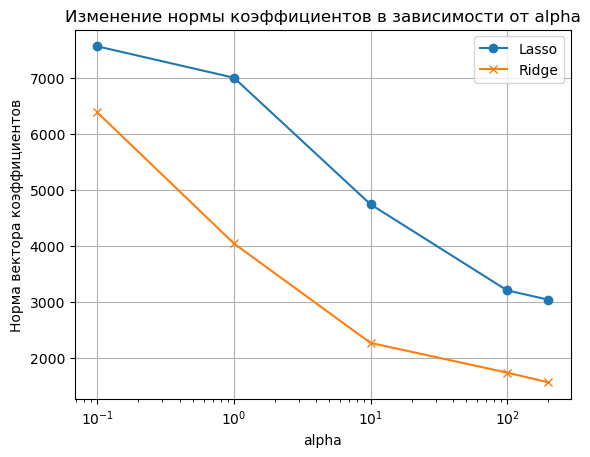

In [30]:
# Значения параметра alpha
alphas = [0.1, 1, 10, 100, 200]

# Для хранения евклидовых норм
lasso_norms = []
ridge_norms = []

for alpha in alphas:
    # Обучение Lasso
    lasso = Lasso(alpha=alpha)
    lasso.fit(car_train_scaled_df, y_car_train)
    lasso_norms.append(np.linalg.norm(lasso.coef_))
    
    # Обучение Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(car_train_scaled_df, y_car_train)
    ridge_norms.append(np.linalg.norm(ridge.coef_))

# Построение графика
plt.plot(alphas, lasso_norms, label='Lasso', marker='o')
plt.plot(alphas, ridge_norms, label='Ridge', marker='x')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Норма вектора коэффициентов')
plt.title('Изменение нормы коэффициентов в зависимости от alpha')
plt.legend()
plt.grid(True)
plt.show()

**Задача 3.11** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.086e+06, tolerance: 3.369e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.003e+06, tolerance: 3.369e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.064e+06, toler

Оптимальное значение alpha: 10.0
Средняя ошибка для оптимального alpha: 5283744.105245308


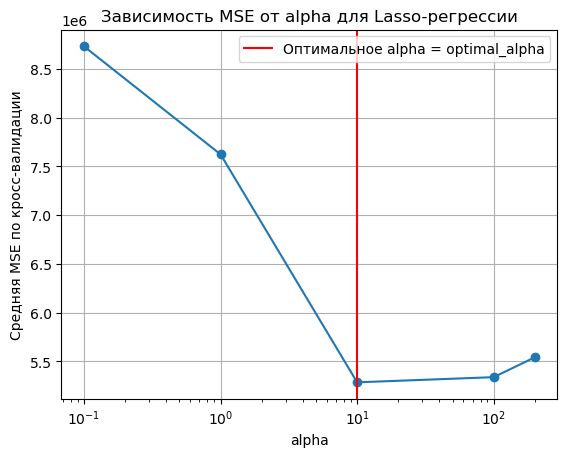

In [32]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(car_train_scaled_df, y_car_train)

mse_path = lasso_cv.mse_path_
mean_mse = np.mean(mse_path, axis=1)

# Определение оптимального значения alpha
optimal_alpha = lasso_cv.alpha_
optimal_alpha_index = np.where(lasso_cv.alphas_ == optimal_alpha)[0][0]

print("Оптимальное значение alpha:", optimal_alpha)
print("Средняя ошибка для оптимального alpha:", mean_mse[optimal_alpha_index])

# Построение графика зависимости MSE от alpha
plt.plot(lasso_cv.alphas_, mean_mse, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Средняя MSE по кросс-валидации')
plt.title('Зависимость MSE от alpha для Lasso-регрессии')
plt.axvline(optimal_alpha, color='r', linestyle='-', label=f'Оптимальное alpha = optimal_alpha')
plt.legend()
plt.grid(True)
plt.show()

**Задача 3.12** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [33]:
lasso_final = Lasso(alpha=optimal_alpha)
lasso_final.fit(car_train_scaled_df, y_car_train)


Lasso(alpha=10.0)

In [36]:
# Получение коэффициентов
coefficients = lasso_final.coef_

# Печать коэффициентов
print("Коэффициенты Lasso-регрессии:")
for i, coef in enumerate(coefficients):
    print(f"Признак {i}: {coef:.4f}")

# Анализ: информативность признаков
informative_features = np.where(coefficients != 0)[0]
non_informative_features = np.where(coefficients == 0)[0]

print("информативные признаки:", informative_features)
print("Неинформативные признаки (с коэффициентом 0):", non_informative_features)

Коэффициенты Lasso-регрессии:
Признак 0: 286.6011
Признак 1: 0.0000
Признак 2: 2628.7198
Признак 3: -194.3920
Признак 4: 1726.9105
Признак 5: 0.0000
Признак 6: -0.0000
Признак 7: -555.4868
Признак 8: -0.0000
Признак 9: 1147.0833
Признак 10: 211.7352
Признак 11: -18.0539
Признак 12: 0.0000
Признак 13: 4.9682
Признак 14: 0.0000
Признак 15: 132.5665
Признак 16: -235.8992
Признак 17: 0.0000
Признак 18: -642.7279
Признак 19: -0.0000
Признак 20: 0.0000
Признак 21: 167.5208
Признак 22: -154.2950
Признак 23: -0.0000
Признак 24: -222.3214
Признак 25: -0.0000
Признак 26: 0.0000
Признак 27: 769.0299
Признак 28: -0.0000
Признак 29: -608.9400
Признак 30: -1584.2019
Признак 31: -1645.4349
Признак 32: -1200.7648
Признак 33: -0.0000
Признак 34: 80.6428
Признак 35: -0.0000
Признак 36: 0.0000
Признак 37: -27.7580
Признак 38: -0.0000
Признак 39: 0.0000
Признак 40: -476.6508
Признак 41: 0.0000
Признак 42: 110.5966
Признак 43: 0.0000
Признак 44: -0.0000
Признак 45: 0.0000
Признак 46: -0.0000
Признак 47: -0

**Задача 3.13** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [43]:
lasso_final

pred_car_price_train_lasso_final = lasso_final.predict(car_train_scaled_df)
pred_car_price_test_lasso_final = lasso_final.predict(car_test_scaled_df)

print(f"LR изначальная Train R2: {metrics.r2_score(y_car_train, pred_car_price_train):.3f}, RMSE: {metrics.mean_squared_error(y_car_train, pred_car_price_train)**0.5:.3f}")
print(f"LR изначальная Test R2: {metrics.r2_score(y_car_test, pred_car_price_test):.3f}, RMSE: {metrics.mean_squared_error(y_car_test, pred_car_price_test)**0.5:.3f}")
print(50*'*')
print(f"Lasso Train R2: {metrics.r2_score(y_car_train, pred_car_price_train_lasso_final):.3f}, RMSE: {metrics.mean_squared_error(y_car_train, pred_car_price_train_lasso_final)**0.5:.3f}")
print(f"Lasso Test R2: {metrics.r2_score(y_car_test, pred_car_price_test_lasso_final):.3f}, RMSE: {metrics.mean_squared_error(y_car_test, pred_car_price_test_lasso_final)**0.5:.3f}")

LR изначальная Train R2: 0.990, RMSE: 616.105
LR изначальная Test R2: 0.707, RMSE: 2819.955
**************************************************
Lasso Train R2: 0.988, RMSE: 682.114
Lasso Test R2: 0.852, RMSE: 2007.819


<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h4>Комментарий студента: <a class="tocSkip"> </h4>

Показатели для Lasso-регрессии получились лучше чем для просто линейно регрессии. Это связано с проведенной регуляризацией и использованием оптимального гиперпараметра альфа.

**(0.01 балл)** Вставьте изображение, описывающее вас в процессе выполнения данного домашнего задания 😊

<img src="https://media.tenor.com/ZCpXCL6vnDoAAAAC/minion-funny.gif" style="width: 400px">